# 1. Importing required libraries


In [24]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
import joblib

In [25]:
# 2. Loading dataset

In [26]:
df = pd.read_csv("Telco-Customer-Churn.csv")

In [27]:
df

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


In [28]:
# 3. Basic dataset information

In [29]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [31]:
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [36]:
# 4 Convert All Column Names to Lowercase

In [40]:
df.columns = df.columns.str.lower()


In [41]:
df

,customerid,gender,seniorcitizen,partner,dependents,tenure,phoneservice,multiplelines,internetservice,onlinesecurity,...,deviceprotection,techsupport,streamingtv,streamingmovies,contract,paperlessbilling,paymentmethod,monthlycharges,totalcharges,churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


In [ ]:
# 5. Fix totalcharges column

In [75]:
import warnings
warnings.filterwarnings("ignore")


In [76]:
df['totalcharges'] = pd.to_numeric(df['totalcharges'])
df['totalcharges'].fillna(df['totalcharges'].median(), inplace=True)

In [48]:
# 6. Drop customerid (not useful)
df.drop('customerid', axis=1, inplace=True)

In [ ]:
# 7 . Encoding categorical variables

In [49]:
# Label Encoding for binary columns
le = LabelEncoder()
binary_cols = ['gender','partner','dependents','phoneservice','paperlessbilling','churn']

for col in binary_cols:
    df[col] = le.fit_transform(df[col])

In [51]:
# 7. One-Hot Encoding for multi-category columns
multi_cols = [
    'multiplelines','internetservice','onlinesecurity','onlinebackup',
    'deviceprotection','techsupport','streamingtv','streamingmovies',
    'contract','paymentmethod'
]
df = pd.get_dummies(df, columns=multi_cols, drop_first=True)

In [52]:
# 8. Split features and target
X = df.drop('churn', axis=1)
y = df['churn']

In [53]:
# 9. Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [54]:
# 10. Train a simple Random Forest model
model = RandomForestClassifier()
model.fit(X_train, y_train)

RandomForestClassifier()

In [55]:
# 11. Predictions
y_pred = model.predict(X_test)

In [56]:
y_pred

array([1, 0, 0, ..., 0, 0, 0])

In [57]:
# 12. Accuracy
print("Model Accuracy:", accuracy_score(y_test, y_pred))

Model Accuracy: 0.794180269694819


In [58]:
# 12 . performing some EDA

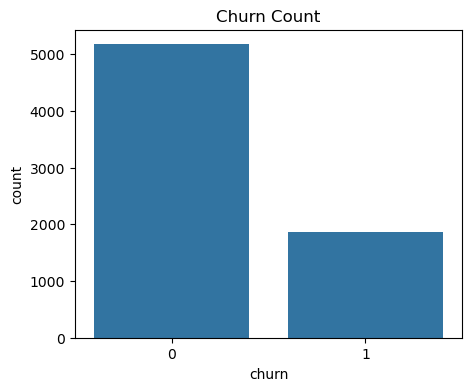

In [59]:
plt.figure(figsize=(5,4))
sns.countplot(x=df["churn"])
plt.title("Churn Count")
plt.show()

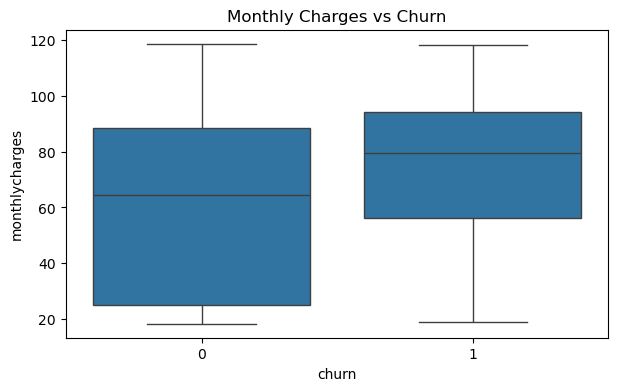

In [66]:
plt.figure(figsize=(7,4))
sns.boxplot(x="churn", y="monthlycharges", data=df)
plt.title("Monthly Charges vs Churn")
plt.show()

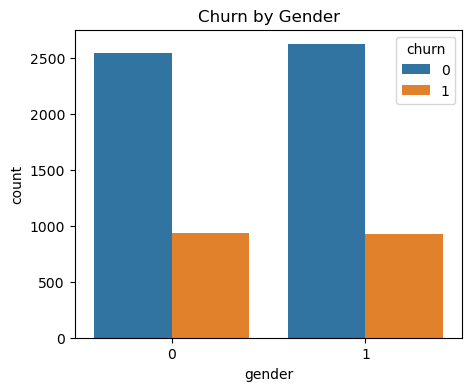

In [69]:
plt.figure(figsize=(5,4))
sns.countplot(data=df, x="gender", hue="churn")
plt.title("Churn by Gender")
plt.show()


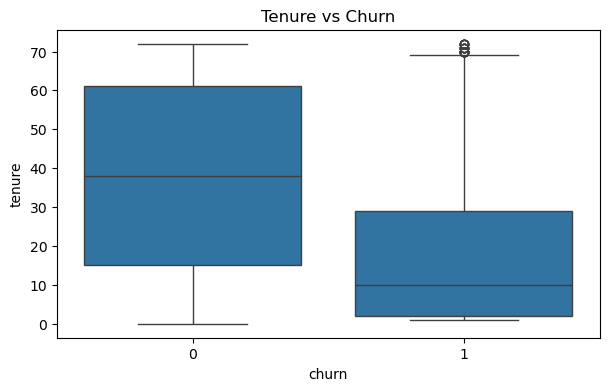

In [60]:
plt.figure(figsize=(7,4))
sns.boxplot(x="churn", y="tenure", data=df)
plt.title("Tenure vs Churn")
plt.show()

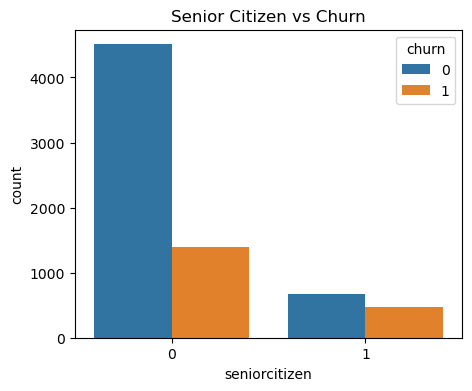

In [70]:
plt.figure(figsize=(5,4))
sns.countplot(data=df, x="seniorcitizen", hue="churn")
plt.title("Senior Citizen vs Churn")
plt.show()


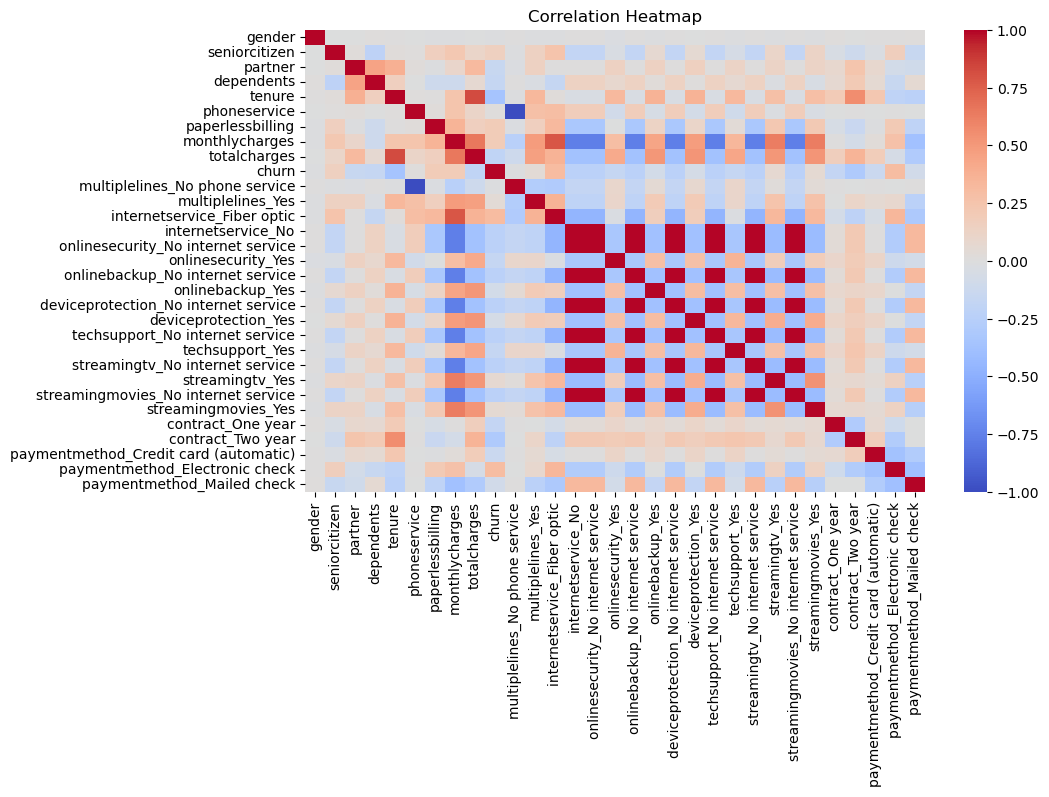

In [71]:
plt.figure(figsize=(10,6))
sns.heatmap(df.corr(), cmap="coolwarm", annot=False)
plt.title("Correlation Heatmap")
plt.show()


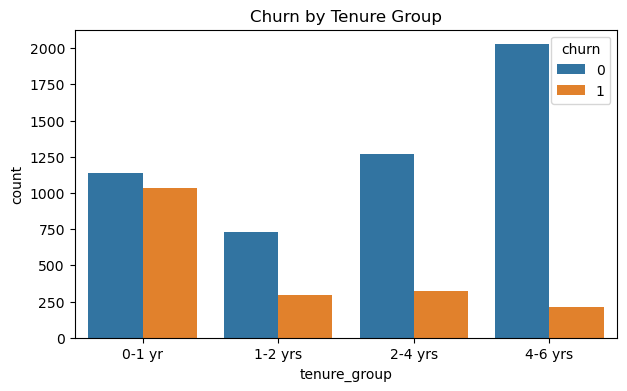

In [72]:
df["tenure_group"] = pd.cut(df["tenure"],
                            bins=[0, 12, 24, 48, 72],
                            labels=["0-1 yr", "1-2 yrs", "2-4 yrs", "4-6 yrs"])

plt.figure(figsize=(7,4))
sns.countplot(data=df, x="tenure_group", hue="churn")
plt.title("Churn by Tenure Group")
plt.show()


Key Insights

-Customers with low tenure (less than 1 year) churn the most, while long-tenure customers are more stable.

-Month-to-month contract users have the highest churn compared to yearly contract customers.

-Customers with higher monthly charges are more likely to churn.

-Fiber optic customers show higher churn than DSL users, indicating possible pricing or service issues.
-Customers without Online Security or Tech Support have a higher churn rate.

-Senior citizens churn more frequently than younger customers.

-Random Forest performed better than Logistic Regression, giving higher accuracy and more reliable prediction